# Testing the trained U-Net models

## Module imports

In [17]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm # progress bar
import numpy as np
from skimage import metrics
from PIL import Image

# custom modules
from unet import StentDataset, UNet

## Loading the Model

In [19]:
model_save_path = "./weights/iter_24000.pt"
model = UNet(in_channels=1, out_channels=1)
model.load_state_dict(torch.load(model_save_path, map_location=torch.device('cpu')))
model.double()
# model.eval()

UNet(
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_down_0): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
  )
  (conv_down_1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
  )
  (conv_down_2): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
  )
  (conv_down_3): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
  )
  (conv_down_4): Sequential(
    (0): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(1024, 1024, kernel_size=(3, 3), stride=(

## Loading test data

In [20]:
test_dataset = StentDataset(input_path="data/dataset/noisy_png",
                            target_path="data/dataset/base_png")
test_loader = DataLoader(test_dataset, batch_size=1)

## Testing model

  0%|          | 0/9 [00:00<?, ?it/s]

Treating the 1th image


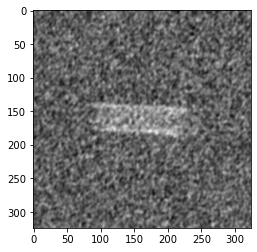

  0%|          | 0/9 [00:03<?, ?it/s]


TypeError: Cannot handle this data type: (1, 1, 324, 324), <u2

In [21]:
for i, data in enumerate(tqdm(test_loader)):
    i += 1
    print(f"Treating the {i}th image")
    # Get inputs and targets
    input = data[0]
    # Calculate outputs
    output = model(input)
    # Preprocess output tensors and targets for scikit-image
    output = output.detach().numpy()



    # output[output<0] = 0
    # output[output>1] = 1

    plt.imshow(output[0,0], cmap="gray")
    plt.show()

    # convert to images
    output = np.uint16(output[0,0] * 65535)
    im = Image.fromarray(output)

    # save image
    save_path = f"data/results/unet/base{i}.png"
    im.save(save_path)

    break
